In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("D:/ML/Practical/ML Dataset/Country-data.csv")

In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [16]:
scaler = StandardScaler()

In [17]:
df[['child','ex','heal','im','inc','inf','le','tf','gd']]= scaler.fit_transform(df[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']])

In [31]:
df.drop(['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp'],inplace=True,axis=1)

KeyError: "['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp'] not found in axis"

In [29]:
df.drop('country',inplace = True, axis=1)

In [30]:
df

,child,ex,heal,im,inc,inf,le,tf,gd
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [32]:
X = df.iloc[:,:].values

In [33]:
X[0]
X[1]

array([-0.5389489 , -0.47965843, -0.09701618,  0.07083669, -0.3753689 ,
       -0.31234747,  0.64786643, -0.85997281, -0.48562324])

In [34]:
from sklearn.cluster import KMeans

In [35]:
wcss = []
for i  in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)
    print(wcss)

[1503.0000000000002]
[1503.0000000000002, 1050.2145582853304]
[1503.0000000000002, 1050.2145582853304, 831.4244352086873]
[1503.0000000000002, 1050.2145582853304, 831.4244352086873, 761.9701878900828]
[1503.0000000000002, 1050.2145582853304, 831.4244352086873, 761.9701878900828, 631.3877859960571]
[1503.0000000000002, 1050.2145582853304, 831.4244352086873, 761.9701878900828, 631.3877859960571, 595.6681749334937]
[1503.0000000000002, 1050.2145582853304, 831.4244352086873, 761.9701878900828, 631.3877859960571, 595.6681749334937, 503.47060316944976]
[1503.0000000000002, 1050.2145582853304, 831.4244352086873, 761.9701878900828, 631.3877859960571, 595.6681749334937, 503.47060316944976, 499.5970498537741]
[1503.0000000000002, 1050.2145582853304, 831.4244352086873, 761.9701878900828, 631.3877859960571, 595.6681749334937, 503.47060316944976, 499.5970498537741, 430.93753281755994]
[1503.0000000000002, 1050.2145582853304, 831.4244352086873, 761.9701878900828, 631.3877859960571, 595.6681749334937

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'WCSS')

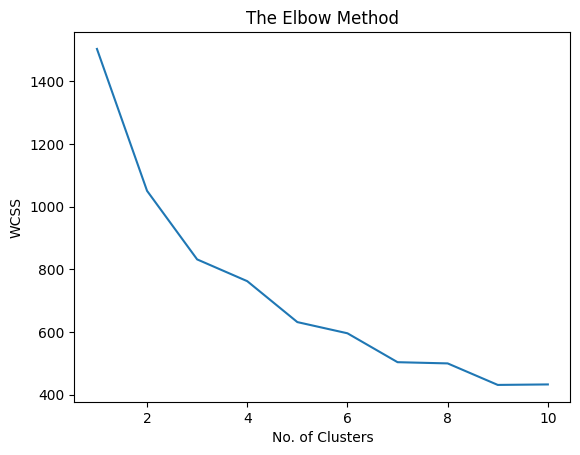

In [37]:
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")

In [38]:
km =  KMeans(n_clusters=4)
y_means = km.fit_predict(X)
print(y_means)

[3 1 0 3 1 0 1 2 2 0 1 1 0 1 1 2 1 3 1 0 1 3 0 2 1 3 3 1 3 2 1 3 3 1 1 1 3
 3 3 1 3 1 2 1 2 1 1 0 1 3 0 1 1 2 2 0 3 1 2 3 2 1 1 3 3 1 3 1 2 0 0 0 0 2
 2 2 1 2 1 0 3 3 2 1 3 1 1 3 3 1 1 2 1 3 3 1 1 3 1 3 1 1 1 0 1 1 3 0 3 0 2
 2 3 0 2 1 0 1 1 1 0 1 2 2 1 0 3 1 0 3 1 1 3 2 1 2 1 3 1 2 0 1 0 1 2 2 0 3
 1 0 3 1 1 1 1 3 1 2 2 2 1 0 1 0 1 0 3]


In [39]:
X[y_means==0,1]

array([-0.09912164, -0.81262812,  0.48266057, -0.91873933,  0.00333057,
       -1.11266674, -0.72481193, -1.32891408,  0.60706682, -0.67724484,
       -0.61504171, -0.6113827 , -0.06253156,  0.1131008 ,  0.20457599,
       -1.50019223, -1.15364762, -0.57845163, -1.01021452, -0.23084591,
       -0.43575034,  0.31068721, -0.78701506, -0.78335605, -0.95898842,
       -1.42368238, -0.34427515, -0.46136339, -0.40647827])

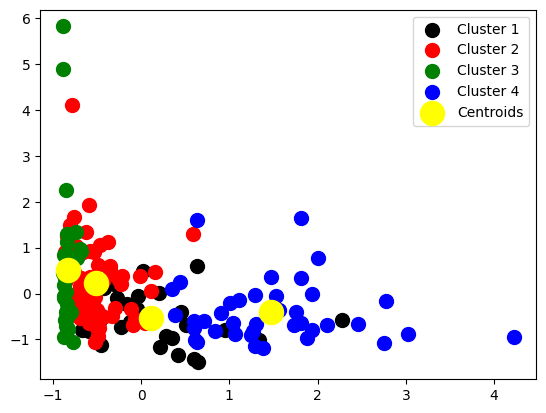

In [40]:
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=100,c="black",label="Cluster 1")
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=100,c="red",label="Cluster 2")
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=100,c="green",label="Cluster 3")
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=100,c="blue",label="Cluster 4")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=300,c="yellow",label="Centroids")
plt.legend()